In [1]:
#---------------------------------------------------
# Importing Required Library and Version
#--------------------------------------------------

import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn


print('Python Version : {}'.format(sys.version))
print('Numpy Version : {}'.format(numpy.__version__))
print('Pandas Version : {}'.format(pandas.__version__))
print('Matplotlib Version : {}'.format(matplotlib.__version__))
print('SeaBorn Version : {}'.format(seaborn.__version__))
print('Scipy Version : {}'.format(scipy.__version__))
print('Sklearn Version : {}'.format(sklearn.__version__))

Python Version : 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
Numpy Version : 1.14.2
Pandas Version : 0.22.0
Matplotlib Version : 2.2.4
SeaBorn Version : 0.8.1
Scipy Version : 1.0.0
Sklearn Version : 0.19.1


In [10]:
#---------------------------------------------------
# Library with Alias
#--------------------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import FreqDist
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SONY\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
#---------------------------------------------------
# Import Data sets
#---------------------------------------------------
#data = pd.read_csv(r"C:\Users\SONY\ARIMA\Sales_Records.csv")
review_train = pd.read_csv(r"C:\Users\SONY\Amazon_Topic_Modelling\train.csv")
print(review_train)
review_test = pd.read_csv(r"C:\Users\SONY\Amazon_Topic_Modelling\test.csv")

                                            Review Text  \
0     Did nothing for me, didn't help lost even with...   
1     Did nothing for me, didn't help lost even with...   
2     I have bought these bags and  immediately open...   
3            Gave me an allergic reaction on my face :(   
4     These don't compare to the name brand wipes. F...   
5     These don't compare to the name brand wipes. F...   
6     These don't compare to the name brand wipes. F...   
7                                               No good   
8     These are EXTREMELY hard to swallow. The pills...   
9     First of all the style I am leaving a review f...   
10    First of all the style I am leaving a review f...   
11    First of all the style I am leaving a review f...   
12    These smelled horrible! As soon as I opened th...   
13    Super easy these don’t work and definitely doe...   
14    Super easy these don’t work and definitely doe...   
15    By my lights, these are a big disappointment. ... 

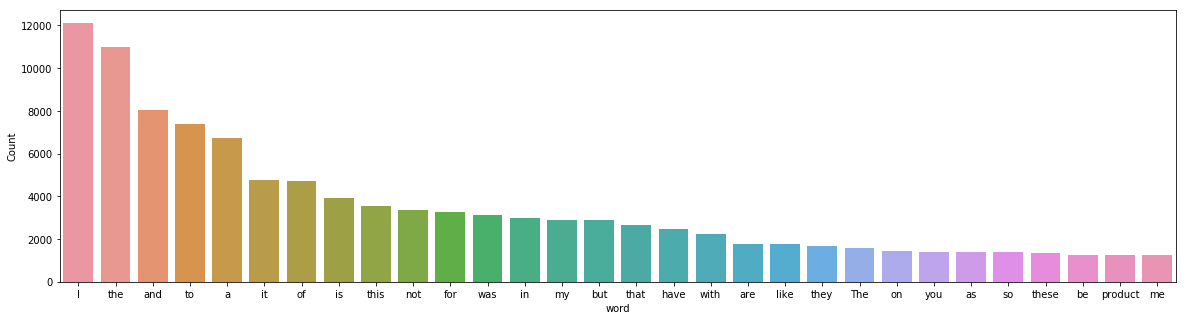

In [12]:
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()
    
freq_words(review_train['Review Text'])

In [13]:
# replace "n't" with " not"
review_train['Review Text'] = review_train['Review Text'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
review_train['Review Text'] = review_train['Review Text'].str.replace("[^a-zA-Z#]", " ")

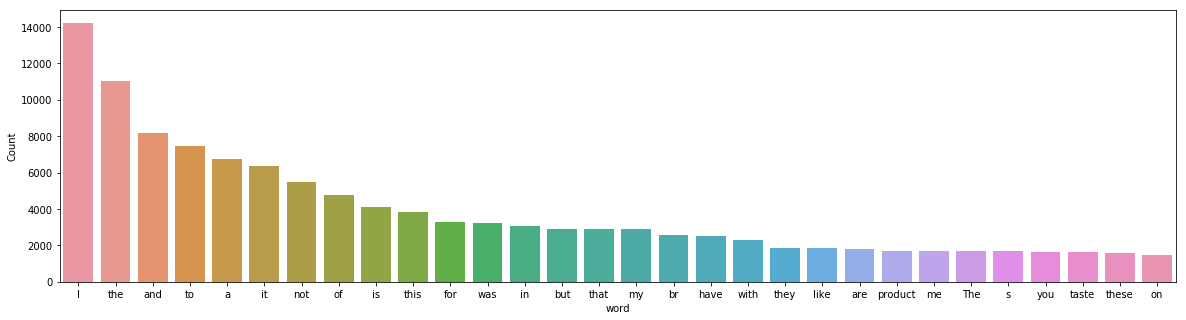

In [14]:
freq_words(review_train['Review Text'])

In [15]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [16]:
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [17]:
# remove short words (length < 3)
review_train['Review Text'] = review_train['Review Text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in review_train['Review Text']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

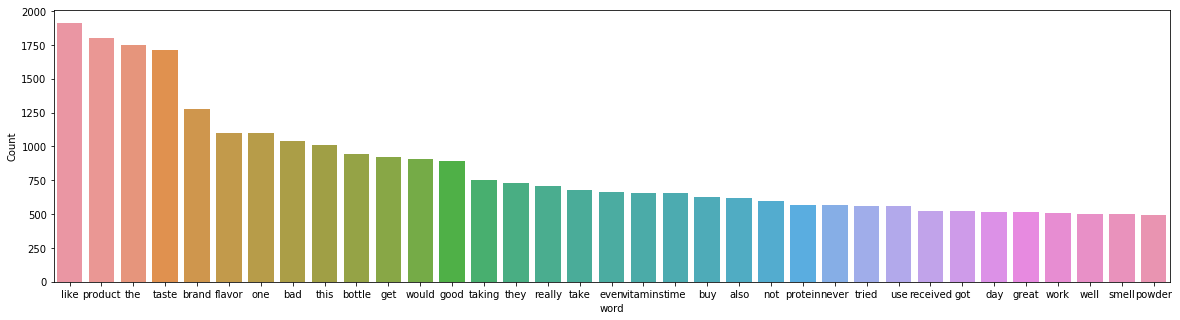

In [18]:
freq_words(reviews, 35)

In [36]:
import spacy

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [40]:
from spacy.cli.download import download

In [43]:
nlp = spacy.load('en', disable=['parser', 'ner'])

In [44]:
def lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['did', 'nothing', 'help', 'lost', 'even', 'working', 'eating', 'healthy', 'did', 'curb', 'appetite', 'anything']


In [45]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['did', 'nothing', 'help', 'lost', 'even', 'working', 'eating', 'healthy', 'did', 'curb', 'appetite', 'anything']


12

In [46]:
reviews_2 = lemmatization(tokenized_reviews)
print(reviews_2[1])

['nothing', 'healthy', 'appetite', 'anything']


In [47]:
print(reviews_2[1])
len(reviews_2[1])

['nothing', 'healthy', 'appetite', 'anything']


4

In [48]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'curb', 'did', 'eating', 'even', 'help', 'lost', 'working'}

In [50]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
review_train['Review Text'] = reviews_3

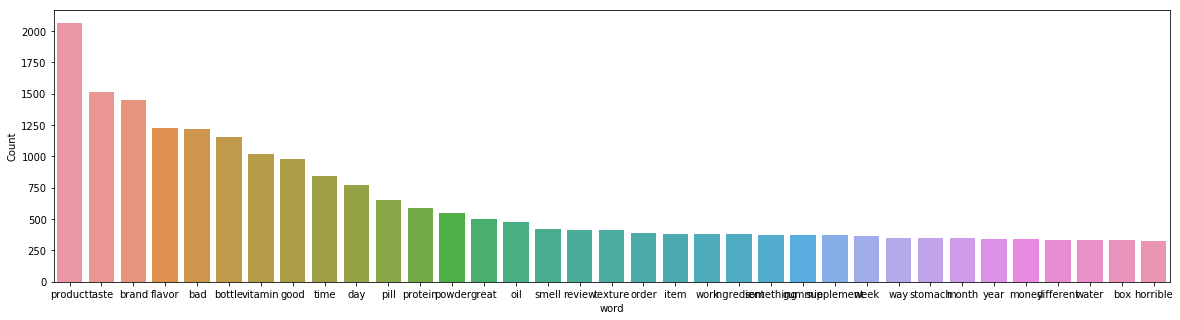

In [51]:
freq_words(review_train['Review Text'], 35)

In [53]:
from gensim import corpora

In [54]:
# Create the term dictionary of our corpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(reviews_2)

In [55]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in reviews_2]

In [58]:
import pyLDAvis
import pyLDAvis.gensim
import gensim

In [59]:
LDA = gensim.models.ldamodel.LdaModel

In [64]:
lda_model = LDA(corpus=doc_term_matrix,
                id2word=dictionary,
                num_topics=21, 
                random_state=100,
                chunksize=1000,
                passes=50)

In [65]:
lda_model.print_topics()

[(6,
  '0.070*"taste" + 0.040*"bad" + 0.037*"weird" + 0.029*"time" + 0.020*"aftertaste" + 0.020*"quality" + 0.019*"people" + 0.017*"tasting" + 0.016*"regular" + 0.016*"chemical"'),
 (17,
  '0.063*"bag" + 0.034*"brand" + 0.033*"use" + 0.032*"least" + 0.029*"wipe" + 0.020*"problem" + 0.017*"baby" + 0.015*"happy" + 0.014*"paper" + 0.013*"fine"'),
 (8,
  '0.106*"flavor" + 0.079*"protein" + 0.070*"powder" + 0.049*"texture" + 0.043*"taste" + 0.037*"chocolate" + 0.029*"water" + 0.025*"scoop" + 0.024*"good" + 0.020*"milk"'),
 (2,
  '0.073*"box" + 0.058*"package" + 0.054*"product" + 0.030*"delivery" + 0.028*"order" + 0.027*"brand" + 0.027*"seal" + 0.026*"item" + 0.024*"seller" + 0.022*"refund"'),
 (19,
  '0.210*"vitamin" + 0.066*"gummy" + 0.034*"gummie" + 0.030*"candy" + 0.030*"flavor" + 0.026*"good" + 0.021*"chew" + 0.021*"tooth" + 0.019*"headache" + 0.018*"orange"'),
 (7,
  '0.062*"time" + 0.050*"month" + 0.046*"plastic" + 0.042*"old" + 0.037*"date" + 0.037*"year" + 0.029*"first" + 0.026*"exp

In [66]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
8      8.427619        1       1  0.189863 -0.140607
16     7.108038        1       2  0.017895 -0.022827
18     6.795112        1       3 -0.037166  0.020452
11     5.936342        1       4  0.149507 -0.055516
6      5.621647        1       5  0.101986 -0.105979
2      5.302975        1       6 -0.249352 -0.105929
13     5.215937        1       7  0.158341 -0.096977
19     5.164456        1       8  0.119474  0.125978
10     4.846958        1       9 -0.192159 -0.110110
17     4.822741        1      10 -0.057147  0.004968
3      4.585826        1      11 -0.061460  0.217747
15     4.572329        1      12 -0.246174 -0.100232
7      4.069453        1      13 -0.093067  0.055303
9      3.997548        1      14  0.022311 -0.133880
5      3.808709        1      15 -0.107497 -0.040328
4      3.806420        1      16  0.150142 -0.100136
12     3.777723        1      17  0.085035  0.106264
0      3.552290        1      18  0.024378  0.290534
20     3.063255        1      19  0.116290  0.001151
14     2.969608        1      20 -0.041767  0.088259
1      2.555004        1      21 -0.049434  0.101863, topic_info=     Category         Freq        Term        Total  loglift  logprob
term                                                                 
118   Default  1069.000000     vitamin  1069.000000  30.0000  30.0000
94    Default  1215.000000      bottle  1215.000000  29.0000  29.0000
74    Default  2193.000000     product  2193.000000  28.0000  28.0000
112   Default   842.000000         day   842.000000  27.0000  27.0000
242   Default  1552.000000       taste  1552.000000  26.0000  26.0000
268   Default  1258.000000      flavor  1258.000000  25.0000  25.0000
147   Default   489.000000         oil   489.000000  24.0000  24.0000
40    Default   703.000000        pill   703.000000  23.0000  23.0000
101   Default   458.000000       smell   458.000000  22.0000  22.0000
18    Default  1553.000000       brand  1553.000000  21.0000  21.0000
238   Default   642.000000     protein   642.000000  20.0000  20.0000
237   Default   577.000000      powder   577.000000  19.0000  19.0000
518   Default   395.000000     stomach   395.000000  18.0000  18.0000
641   Default   320.000000        skin   320.000000  17.0000  17.0000
116   Default   397.000000      gummie   397.000000  16.0000  16.0000
5     Default   345.000000         box   345.000000  15.0000  15.0000
243   Default   446.000000     texture   446.000000  14.0000  14.0000
108   Default   407.000000        work   407.000000  13.0000  13.0000
389   Default   305.000000       gummy   305.000000  12.0000  12.0000
686   Default   259.000000        fish   259.000000  11.0000  11.0000
298   Default   347.000000       money   347.000000  10.0000  10.0000
4     Default   273.000000         bag   273.000000   9.0000   9.0000
209   Default   397.000000        item   397.000000   8.0000   8.0000
308   Default   276.000000     package   276.000000   7.0000   7.0000
48    Default  1263.000000         bad  1263.000000   6.0000   6.0000
85    Default   897.000000        time   897.000000   5.0000   5.0000
129   Default   412.000000       order   412.000000   4.0000   4.0000
37    Default   237.000000      effect   237.000000   3.0000   3.0000
96    Default   344.000000    horrible   344.000000   2.0000   2.0000
136   Default   390.000000        week   390.000000   1.0000   1.0000
...       ...          ...         ...          ...      ...      ...
188   Topic21    10.686684        wear    11.692208   3.5772  -5.3629
1873  Topic21    10.534024       story    11.539549   3.5759  -5.3773
1874  Topic21    10.265040       twist    11.270565   3.5737  -5.4032
1768  Topic21    10.085015      screen    11.090540   3.5721  -5.4209
1864  Topic21     9.545856      injury    10.551381   3.5670  -5.4758
484   Topic21     8.650691        tape     9.656216   3.5572  -5.5743
338   To

In [67]:
lda_model.print_topics()

[(15,
  '0.072*"product" + 0.053*"item" + 0.046*"order" + 0.039*"disappointed" + 0.038*"open" + 0.037*"store" + 0.032*"weight" + 0.024*"wrong" + 0.022*"brand" + 0.020*"cold"'),
 (17,
  '0.063*"bag" + 0.034*"brand" + 0.033*"use" + 0.032*"least" + 0.029*"wipe" + 0.020*"problem" + 0.017*"baby" + 0.015*"happy" + 0.014*"paper" + 0.013*"fine"'),
 (7,
  '0.062*"time" + 0.050*"month" + 0.046*"plastic" + 0.042*"old" + 0.037*"date" + 0.037*"year" + 0.029*"first" + 0.026*"expiration" + 0.025*"last" + 0.021*"bottle"'),
 (13,
  '0.072*"work" + 0.041*"good" + 0.039*"taste" + 0.032*"energy" + 0.028*"flavor" + 0.027*"product" + 0.024*"drink" + 0.024*"food" + 0.022*"strong" + 0.021*"way"'),
 (19,
  '0.210*"vitamin" + 0.066*"gummy" + 0.034*"gummie" + 0.030*"candy" + 0.030*"flavor" + 0.026*"good" + 0.021*"chew" + 0.021*"tooth" + 0.019*"headache" + 0.018*"orange"'),
 (0,
  '0.075*"gummie" + 0.055*"size" + 0.049*"swallow" + 0.042*"large" + 0.040*"small" + 0.038*"big" + 0.036*"pill" + 0.036*"difference" + 0